In [5]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

# Add parent directory to path
sys.path.append(os.path.abspath('..'))

In [6]:
from src.preprocess import load_and_window_data

# data load
data_path = '../data/BCICIV_calib_ds1a.mat'
fs = 100 

# Load and window data
X, y = load_and_window_data(data_path, fs=fs)

print(f"Dataset shape after windowing: {X.shape}")
print(f"Labels shape: {y.shape}")

Dataset shape after windowing: (200, 59, 300)
Labels shape: (200,)


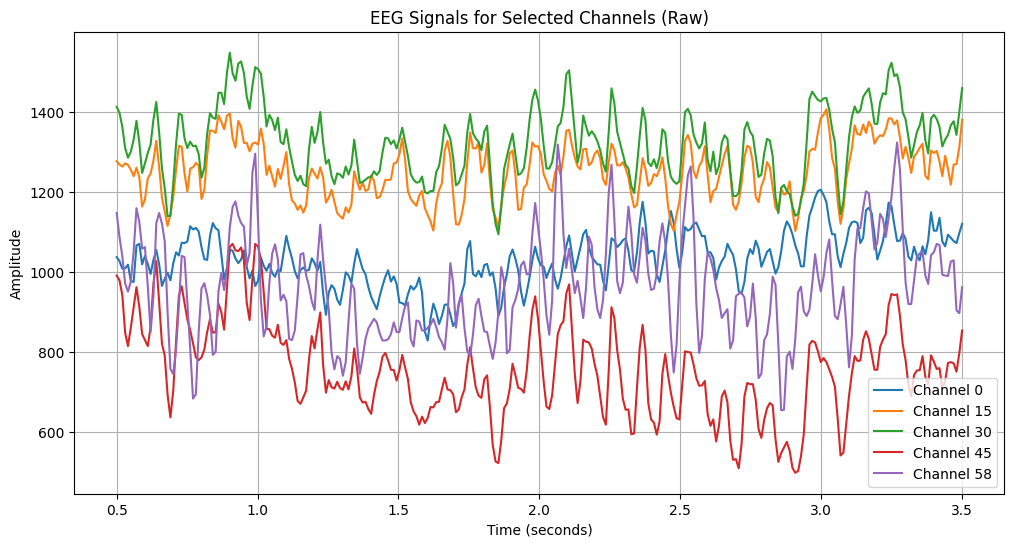

In [7]:
sample_idx = 0 
channels_to_plot = [0, 15, 30, 45, 58] # 0-indexed
time_axis = np.linspace(0.5, 3.5, X.shape[2])

plt.figure(figsize=(12, 6))
for ch in channels_to_plot:
    plt.plot(time_axis, X[sample_idx, ch, :], label=f'Channel {ch}')

plt.title('EEG Signals for Selected Channels (Raw)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

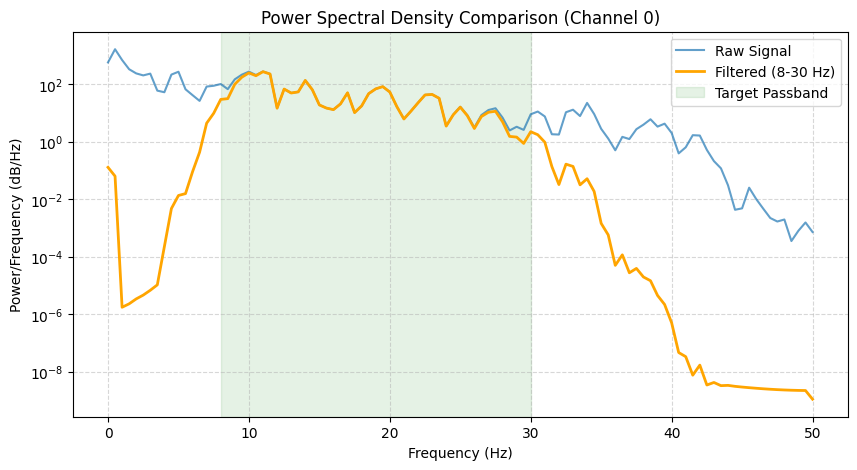

In [8]:
from src.preprocess import apply_bandpass_filter, plot_psd_comparison

X_filtered = apply_bandpass_filter(X, fs=fs)

plot_psd_comparison(X, X_filtered, fs=fs, channel_idx=0)

In [9]:
from src.preprocess import split_data

X_train, X_test, y_train, y_test = split_data(X_filtered, y)

In [10]:
from src.preprocess import apply_csp

X_train_csp, X_test_csp, csp_model = apply_csp(X_train, y_train, X_test, n_components=4)

print(f"Shape before CSP: {X_train.shape}")
print(f"Shape after CSP: {X_train_csp.shape}")

Computing rank from data with rank=None
    Using tolerance 1.4e+03 (2.2e-16 eps * 59 dim * 1.1e+17  max singular value)
    Estimated rank (data): 59
    data: rank 59 computed from 59 data channels with 0 projectors
Reducing data rank from 59 -> 59
Estimating class=0 covariance using EMPIRICAL
Done.
Estimating class=1 covariance using EMPIRICAL
Done.
Shape before CSP: (150, 59, 300)
Shape after CSP: (150, 4)


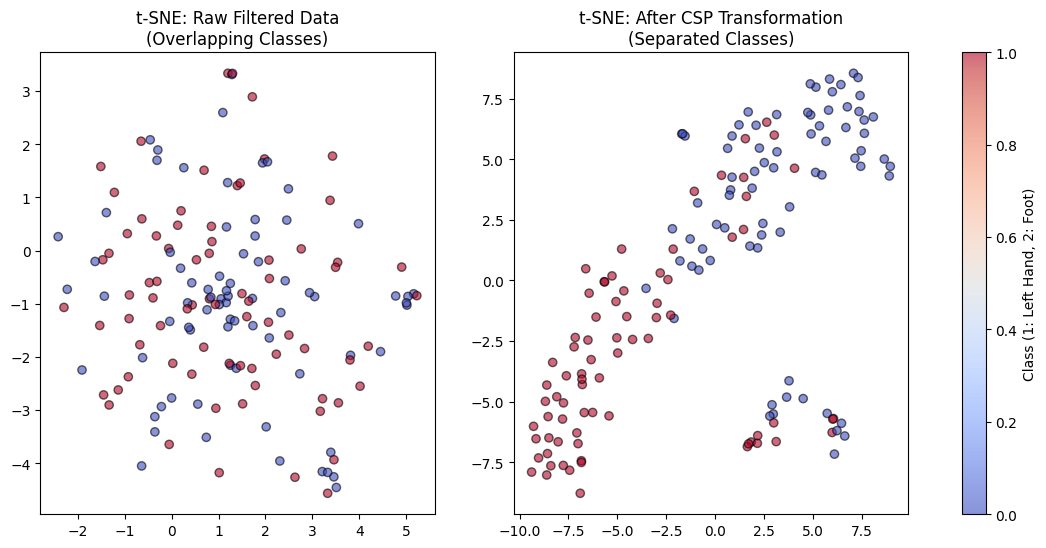

In [11]:
from src.preprocess import compute_tsne_projection

# call funciton
proj_before, proj_after = compute_tsne_projection(X_train, X_train_csp)

# plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Before CSP
axes[0].scatter(proj_before[:, 0], proj_before[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.6)
axes[0].set_title('t-SNE: Raw Filtered Data\n(Overlapping Classes)')

# Plot After CSP
scatter = axes[1].scatter(proj_after[:, 0], proj_after[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', alpha=0.6)
axes[1].set_title('t-SNE: After CSP Transformation\n(Separated Classes)')

plt.colorbar(scatter, ax=axes, label='Class (1: Left Hand, 2: Foot)')
plt.show()

In [13]:
from src.preprocess import save_processed_data

# Save the CSP features 
save_processed_data(X_train_csp, X_test_csp, y_train, y_test)

Successfully saved processed data to ../data
